# Support Vector Machines:

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

From https://scikit-learn.org/stable/modules/svm.html#svm Highly recommended to visit it has much more info and examples

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (*numpy.ndarray* and convertible to that by *numpy.asarray*) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

**NumPy** is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object

* sophisticated (broadcasting) functions

* tools for integrating C/C++ and Fortran code

* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

NumPy is licensed under the BSD license, enabling reuse with few restrictions.

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.


**sklearn**
* Simple and efficient tools for predictive data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

**Importar Librerías**

In [1]:
# Importar libreria numpy https://numpy.org/
import numpy as np

# Importar matplotlib https://matplotlib.org/
import matplotlib.pyplot as plt

# Importa sklearn https://scikit-learn.org/stable/
# The sklearn.svm module includes Support Vector Machine algorithms.
# https://scikit-learn.org/stable/modules/svm.html#svm
from sklearn import svm

# The sklearn.datasets module includes utilities to load datasets, including 
# methods to load and fetch popular reference datasets. It also features some 
# artificial data generators.

# Samples generator / make_blobs
# Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs

**Generar Datos en 2 hiperplanos**

In [2]:
# Genera 100 datos en 2 hiperplanos

# n_samples: int or array-like, optional (default=100)
#   If int, it is the total number of points equally divided among clusters. 
#   If array-like, each element of the sequence indicates the number of samples per cluster.

# centers: int or array of shape [n_centers, n_features], optional
#   (default=None) The number of centers to generate, or the fixed center locations.
#   If n_samples is an int and centers is None, 3 centers are generated. 
#   If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

# random_state: int, RandomState instance, default=None
#   Determines random number generation for dataset creation.
#   Pass an int for reproducible output across multiple function calls.

X, y = make_blobs(n_samples=100, centers=2, random_state=6)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

**Define SVC**
Configure the SVC set by kernel

**SVC**, *NuSVC* and *LinearSVC* are classes capable of performing binary and multi-class classification on a dataset.

In [3]:
# Configure the SVC

# C: float, default=1.0
#   Regularization parameter. The strength of the regularization is inversely proportional to C. 
#   Must be strictly positive. The penalty is a squared l2 penalty.

# kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#   Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
#   If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices;
#   that matrix should be an array of shape (n_samples, n_samples).
clf = svm.SVC(kernel='linear', C=1000)

# Alimenta el modelo
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

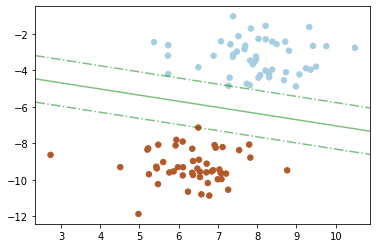

In [4]:
# Hace que los datos sean dispersos 

#x, y: scalar or array-like, shape (n, )
#   The dat a positions.

# s: scalar or array-like, shape (n, ), optional
#   The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.

# c: color, sequence, or sequence of colors, optional

# cmap: Colormap, optional, default: None

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Definir formatos de la grafica
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Define limites escala, reticula
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T 
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='g', levels=[-1, 0, 1], alpha=0.5, linestyles=['-.', '-', '-.'])

# plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

Para bien entender lo que hace este algoritmo de SVM:

1-Definimos nuestra dimension n, en este caso tenemos una dimension 2D, y confirmamos que nuestro dataset es linealmente separable.

2-Se tiene que hallar un hiperplano que separe nuestros datos, es decir un subespacio de dimension n-1, en este caso sera 1D, una recta, la cual debe estar lo mas alejada posible de nuestros datos, para que pase esto tenemos que indicarle: kernel=“linear”, si nuestro dataset no fuera linealmente separable tendriamos que usar otro tipo de kernel como una funcion polinomial, entre otras.

3-Esto es lo mas importante del SVM: se tienen que hallar los vectores de soporte(de ahi viene el nombre), los cuales tienen que ser paralelos al hiperplano y tienen que establecer un margen de tal forma que el hiperplano este lo mas separado posible de nuestros datos.

En caso de que nuestros datos no se puedan separar linealmente o polinomicamente, lo que tenemos que hacer es aumentar nuestra dimension en n+1(3D) y conseguir una funcion f(x,y) que clasifique bien nuestros datos.Ejemplo:
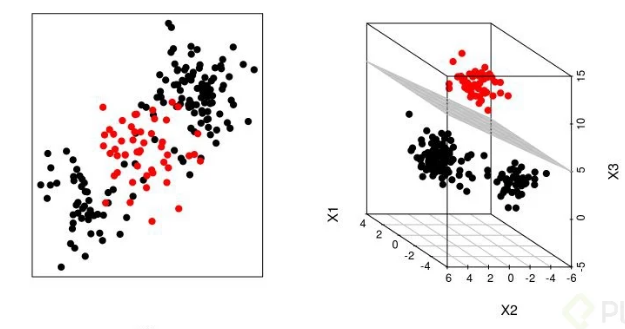